In [174]:
import numpy as np
import matplotlib.pyplot as plt
import math

We're tracking Jupiter's moons: Io, Europa, Ganymede, and Callisto.

We're given their starting positions. Their initial velocities all start at 0.

### Time update order:

1. Update velocity by applying gravity
2. Update positions by applying velocity

Apply gravity by considering each pair of moons.

_on each axis_ gravity increases the velocity between two bodies by _exactly_ +/- 1

In [130]:
# Create a Moon class:


class Moon:
    def __init__(self,coord):
        self.coord = np.array(coord)
        self.vel = np.array([0,0,0])
        
        moons.append(self)
        
    def move(self):
        # Adjust a moon's position by its velocity
        self.coord += self.vel
    
    def gravity(self, other):
        # Adjust a moon's velocity based on one other moon's position
        for axis in range(3):
            if self.coord[axis] > other.coord[axis]:
                self.vel[axis] -= 1
            elif self.coord[axis] < other.coord[axis]:
                self.vel[axis] += 1
                
    def energy(self):
        # Calculate a Moon's energy
        pot = np.sum(abs(self.coord)) # potential energy
        kin = np.sum(abs(self.vel)) # kinetic energy
        return pot * kin

### My input:

x=0, y=4, z=0

x=-10, y=-6, z=-14

x=9, y=-16, z=-3

x=6, y=-1, z=2

In [131]:
moons = [] # initialize the list of moons

Io = Moon([0,4,0])
Eur = Moon([-10,-6,-14])
Gan = Moon([9,-16,-3])
Cal = Moon([6,-1,2])

# Demo set:
moons = [] # initialize the list of moons

Io = Moon([-8,-10,0])
Eur = Moon([5,5,10])
Gan = Moon([2,-7,3])
Cal = Moon([9,-8,-3])

In [68]:
def update_vels():
    global Io, Eur, Gan, Cal, moons
    for tbu in moons:
        for udb in moons:
            tbu.gravity(udb)
            
def update_coords():
    global Io, Eur, Gan, Cal, moons
    for moon in moons:
        moon.move()
        
def calc_energy():
    global Io, Eur, Gan, Cal, moons, energy
    en = 0
    for moon in moons:
        en += moon.energy()
    energy.append(en)

In [73]:
for i in range(1000):
    update_vels()
    update_coords()

In [74]:
Io.coord, Eur.coord, Gan.coord, Cal.coord

(array([-16,  79, -15]),
 array([124, -44,  39]),
 array([-57, -47,  -4]),
 array([-46,  -7, -35]))

In [75]:
energy = 0

for moon in moons:
    energy += moon.energy()
    
energy

13500

## Part 2!

Oh boy... let's look for a pattern.

For states to match exactly, the energy must also match, right? Let's look for a trend in the energy value.

In [139]:
def calc_energy():
    global Io, Eur, Gan, Cal, moons, energy, i
    en = 0
    for moon in moons:
        en += moon.energy()
    
    #en += Io.energy()
    
    if len(energy) >0:
        if en==energy[0]:
            print('step ' + str(i))
            for moon in moons:
                print(moon.coord, moon.vel)
        
    
    energy.append(en)
    

In [133]:
moons = [] # initialize the list of moons

Io = Moon([0,4,0])
Eur = Moon([-10,-6,-14])
Gan = Moon([9,-16,-3])
Cal = Moon([6,-1,2])

In [134]:
energy = []

calc_energy()

for moon in moons:
    print(moon.coord, moon.vel)

for i in range(10000):
    update_vels()
    update_coords()
    calc_energy()

[0 4 0] [0 0 0]
[-10  -6 -14] [0 0 0]
[  9 -16  -3] [0 0 0]
[ 6 -1  2] [0 0 0]


In [126]:
energy

[]

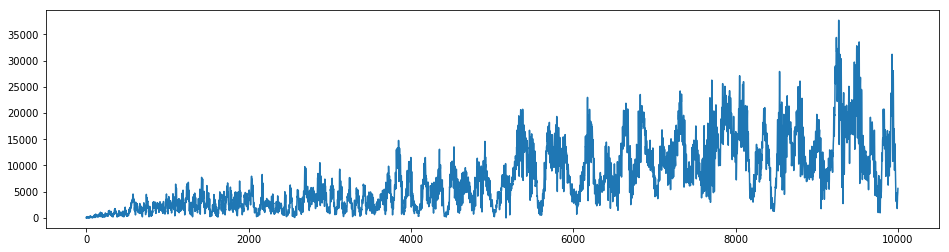

In [95]:
plt.figure(figsize=(16,4))
plt.plot(energy)

Each axis is independant here. Maybe there are shorter wavelength patters on each axis?

I should be able to work with my existing code if I just input values for one axis:

In [150]:
# Moon x-axis

moons = [] # initialize the list of moons

Io = Moon([0,0,0])
Eur = Moon([-10,0,0])
Gan = Moon([9,0,0])
Cal = Moon([6,0,0])

In [151]:
energy = []

calc_energy()

for moon in moons:
    print(moon.coord, moon.vel)
for i in range(300000):
    update_vels()
    update_coords()
    calc_energy()

[0 0 0] [0 0 0]
[-10   0   0] [0 0 0]
[9 0 0] [0 0 0]
[6 0 0] [0 0 0]
step 143165
[-400    0    0] [0 0 0]
[591   0   0] [0 0 0]
[-551    0    0] [0 0 0]
[365   0   0] [0 0 0]
step 286331
[0 0 0] [0 0 0]
[-10   0   0] [0 0 0]
[9 0 0] [0 0 0]
[6 0 0] [0 0 0]


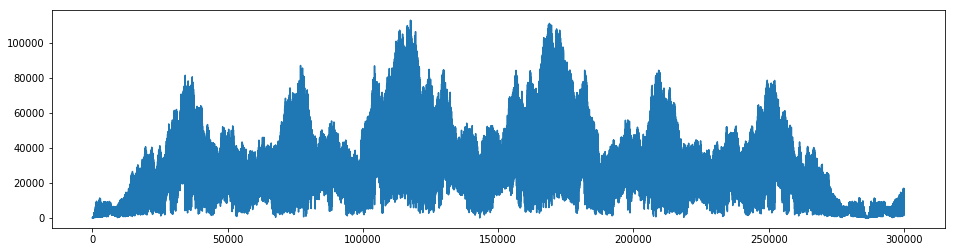

In [152]:
plt.figure(figsize=(16,4))
plt.plot(energy)

Aha! The periodicity along the x-axis is 286331 (or one less than that!). Let's find it for the other axes as well:

In [156]:
# Moon y-axis

moons = [] # initialize the list of moons

Io = Moon([0,4,0])
Eur = Moon([0,-6,0])
Gan = Moon([0,-16,0])
Cal = Moon([0,-1,0])

In [157]:
energy = []

calc_energy()

for moon in moons:
    print(moon.coord, moon.vel)
for i in range(175000):
    update_vels()
    update_coords()
    calc_energy()

[0 4 0] [0 0 0]
[ 0 -6  0] [0 0 0]
[  0 -16   0] [0 0 0]
[ 0 -1  0] [0 0 0]
step 80713
[   0 -463    0] [0 0 0]
[  0 472   0] [0 0 0]
[  0 629   0] [0 0 0]
[   0 -657    0] [0 0 0]
step 161427
[0 4 0] [0 0 0]
[ 0 -6  0] [0 0 0]
[  0 -16   0] [0 0 0]
[ 0 -1  0] [0 0 0]


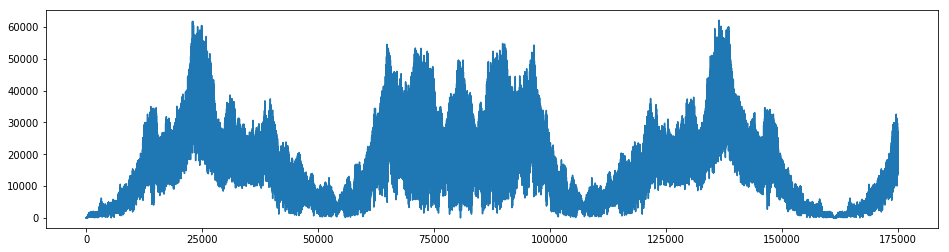

In [158]:
plt.figure(figsize=(16,4))
plt.plot(energy)

y-axis repeats after 161427 steps!

In [161]:
# moon z-axis 
moons = [] # initialize the list of moons

Io = Moon([0,0,0])
Eur = Moon([0,0,-14])
Gan = Moon([0,0,-3])
Cal = Moon([0,0,2])

In [162]:
energy = []

calc_energy()

for moon in moons:
    print(moon.coord, moon.vel)
for i in range(50000):
    update_vels()
    update_coords()
    calc_energy()

[0 0 0] [0 0 0]
[  0   0 -14] [0 0 0]
[ 0  0 -3] [0 0 0]
[0 0 2] [0 0 0]
step 48117
[  0   0 -14] [0 0 0]
[0 0 0] [0 0 0]
[ 0  0 -3] [0 0 0]
[0 0 2] [0 0 0]


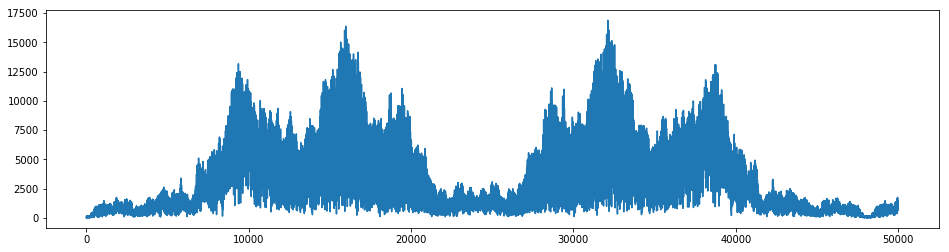

In [163]:
plt.figure(figsize=(16,4))
plt.plot(energy)

The z-axis repeats every 48117 time steps.

In [184]:
# So:
x_cycle = 286331
y_cycle = 161427
z_cycle = 48117

We need to compute the Lowest Common Multiple of these values. To do the LCM, we also need the Greatest Common Denominator

In [181]:
def gcd(a,b):
    """Compute the greatest common divisor of a and b"""
    while b > 0:
        a, b = b, a % b
    return a
    
def lcm(a, b):
    """Compute the lowest common multiple of a and b"""
    return int(a * b / gcd(a, b))

In [187]:
lcm(lcm(x_cycle+1, y_cycle+1),z_cycle+1)

278013787106916

I'm not sure why I had to ADD one to the cycles, but meh!